In [44]:
# Data transformation
library(dplyr)
library(readr)
library(lubridate)
# Data visualization
library(ggplot2)
library(scales)
# Custom R file
source("../Common/func.R")

In [98]:
elecDF      <-  read_csv("../../curated/electricity/gold_monthly_electricity.csv", show_col_types = FALSE) %>%
                mutate(
                    year_month = factor(paste(year, month, sep = "-"))
                )
gasDF       <-  read_csv("../../curated/natural_gas/gold_monthly_natural_gas.csv", show_col_types = FALSE) %>%
                mutate(
                    year_month = factor(paste(year, month, sep = "-"))
                )
waterDF       <-  read_csv("../../curated/water/gold_monthly_water.csv", show_col_types = FALSE) %>%
                mutate(
                    year_month = factor(paste(year, month, sep = "-"))
                )
weatherDF   <-  read_csv("../../curated/weather/gold_monthly_weather.csv", show_col_types = FALSE) %>%
                mutate(
                    year_month = factor(paste(year, month, sep = "-"))
                )

In [100]:
data <- weatherDF %>%
    left_join(elecDF,   by = c("year", "month"), suffix = c("", "_elec")) %>%
    left_join(gasDF,    by = c("year", "month"), suffix = c("", "_gas")) %>%
    left_join(waterDF,    by = c("year", "month"), suffix = c("", "_water")) %>%
    rename(consumption_elec = consumption) %>%
    select(
        year, 
        month,
        year_month,
        avg_temp,
        avg_dewpt_temp,
        avg_rel_hum_pct,
        avg_wind_dir,
        avg_wind_spd,
        avg_visib,
        avg_stn_press,
        avg_hmdx,
        avg_wind_chill,
        consumption_elec,
        consumption_gas,
        consumption_water
    )

In [101]:
glimpse(data)

Rows: 24
Columns: 15
$ year              <dbl> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012~
$ month             <dbl> 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8~
$ year_month        <fct> 2012-4, 2012-5, 2012-6, 2012-7, 2012-8, 2012-9, 2012~
$ avg_temp          <dbl> 9.467917, 12.207661, 14.148611, 17.513306, 18.765860~
$ avg_dewpt_temp    <dbl> 4.6700000, 5.4283602, 8.0479167, 10.6866935, 12.6963~
$ avg_rel_hum_pct   <dbl> 72.71250, 64.13306, 67.47500, 64.81183, 68.90726, 75~
$ avg_wind_dir      <dbl> 18.35833, 19.77151, 16.84722, 16.46237, 19.10753, 21~
$ avg_wind_spd      <dbl> 13.330556, 14.127688, 12.858333, 12.536290, 12.51344~
$ avg_visib         <dbl> 28.73361, 35.80578, 30.24722, 34.40470, 38.44758, 39~
$ avg_stn_press     <dbl> 101.4942, 101.8121, 101.5036, 101.6377, 101.5871, 10~
$ avg_hmdx          <dbl> 26.00000, 26.00000, 26.00000, 26.00134, 26.18817, 25~
$ avg_wind_chill    <dbl> -5.000000, -5.000000, -5.000000, -5.000000, -5.00000~
$ consumption_elec 

In [105]:
avg_temp_cons_elec           <- cor(data$avg_temp, data$consumption_elec)
avg_dewpt_temp_cons_elec     <- cor(data$avg_dewpt_temp, data$consumption_elec)
avg_rel_hum_pct_cons_elec    <- cor(data$avg_wind_dir, data$consumption_elec)
avg_wind_spd_cons_elec       <- cor(data$avg_wind_spd, data$consumption_elec)
avg_visib_cons_elec          <- cor(data$avg_visib, data$consumption_elec)
avg_stn_press_cons_elec      <- cor(data$avg_stn_press, data$consumption_elec)
avg_hmdx_cons_elec           <- cor(data$avg_hmdx, data$consumption_elec)
avg_wind_chill_cons_elec     <- cor(data$avg_wind_chill, data$consumption_elec)

avg_temp_cons_gas           <- cor(data$avg_temp, data$consumption_gas)
avg_dewpt_temp_cons_gas     <- cor(data$avg_dewpt_temp, data$consumption_gas)
avg_rel_hum_pct_cons_gas    <- cor(data$avg_rel_hum_pct, data$consumption_gas)
avg_wind_dir_cons_gas       <- cor(data$avg_wind_dir, data$consumption_gas)
avg_wind_spd_cons_gas       <- cor(data$avg_wind_spd, data$consumption_gas)
avg_visib_cons_gas          <- cor(data$avg_visib, data$consumption_gas)
avg_stn_press_cons_gas      <- cor(data$avg_stn_press, data$consumption_gas)
avg_hmdx_cons_gas           <- cor(data$avg_hmdx, data$consumption_gas)
avg_wind_chill_cons_gas     <- cor(data$avg_wind_chill, data$consumption_gas)

avg_temp_cons_water         <- cor(data$avg_temp, data$consumption_water)
avg_dewpt_temp_cons_water   <- cor(data$avg_dewpt_temp, data$consumption_water)
avg_rel_hum_pct_cons_water  <- cor(data$avg_rel_hum_pct, data$consumption_water)
avg_wind_dir_cons_water     <- cor(data$avg_wind_dir, data$consumption_water)
avg_wind_spd_cons_water     <- cor(data$avg_wind_spd, data$consumption_water)
avg_visib_cons_water        <- cor(data$avg_visib, data$consumption_water)
avg_stn_press_cons_water    <- cor(data$avg_stn_press, data$consumption_water)
avg_hmdx_cons_water         <- cor(data$avg_hmdx, data$consumption_water)
avg_wind_chill_cons_water   <- cor(data$avg_wind_chill, data$consumption_water)
cons_elec_cons_water        <- cor(data$consumption_elec, data$consumption_water)
cons_gas_cons_water         <- cor(data$consumption_elec, data$consumption_water)

cors <- c(
    avg_temp_cons_water,        
    avg_dewpt_temp_cons_water,     
    avg_rel_hum_pct_cons_water,    
    avg_wind_dir_cons_water,       
    avg_wind_spd_cons_water,       
    avg_visib_cons_water,          
    avg_stn_press_cons_water,      
    avg_hmdx_cons_water,           
    avg_wind_chill_cons_water,
    cons_elec_cons_water,
    cons_gas_cons_water 
)

for (i in cors) {
    print(i)
}

[1] -0.0039267
[1] 0.09304529
[1] 0.282546
[1] 0.07546684
[1] 0.06857231
[1] 0.07323448
[1] 0.1085128
[1] 0.3072639
[1] 0.07600775
[1] 0.3130587
[1] 0.3130587


In [85]:
lmodel_avg_temp             <- lm(consumption_gas ~ avg_temp, data)
lmodel_avg_dewpt_temp       <- lm(consumption_gas ~ avg_dewpt_temp, data)
lmodel_avg_temp_dewpt_temp  <- lm(consumption_gas ~ avg_temp * avg_dewpt_temp, data)

print(summary(lmodel_avg_temp)$r.squared)
print(summary(lmodel_avg_dewpt_temp)$r.squared)
print(summary(lmodel_avg_temp_dewpt_temp)$r.squared)

[1] 0.7940846
[1] 0.7314721
[1] 0.9361534


In [113]:
lmodel_elec <- lm(consumption_elec ~ avg_temp + avg_dewpt_temp + consumption_gas + avg_temp:consumption_gas + avg_dewpt_temp:consumption_gas, data)
print(paste0("model 1: ", summary(lmodel_elec)$r.squared))

lmodel_gas <- lm(consumption_gas ~ avg_temp + avg_dewpt_temp + consumption_elec + avg_temp:consumption_elec + avg_dewpt_temp:consumption_elec, data)
print(summary(lmodel_gas)$r.squared)

lmodel_gas_water <- lm(consumption_gas ~ avg_temp + avg_dewpt_temp + consumption_elec + consumption_water + consumption_elec:consumption_water + avg_temp:consumption_elec + avg_dewpt_temp:consumption_elec, data)
print(summary(lmodel_gas_water)$r.squared)

lmodel_elec_water <- lm(consumption_elec ~ avg_temp + avg_dewpt_temp + consumption_gas + consumption_water + consumption_gas:consumption_water + avg_temp:consumption_gas + avg_dewpt_temp:consumption_gas, data)
print(summary(lmodel_elec_water)$r.squared)



[1] "model 1: 0.766698556850003"
[1] 0.8519465
[1] 0.9454278
[1] 0.8787102


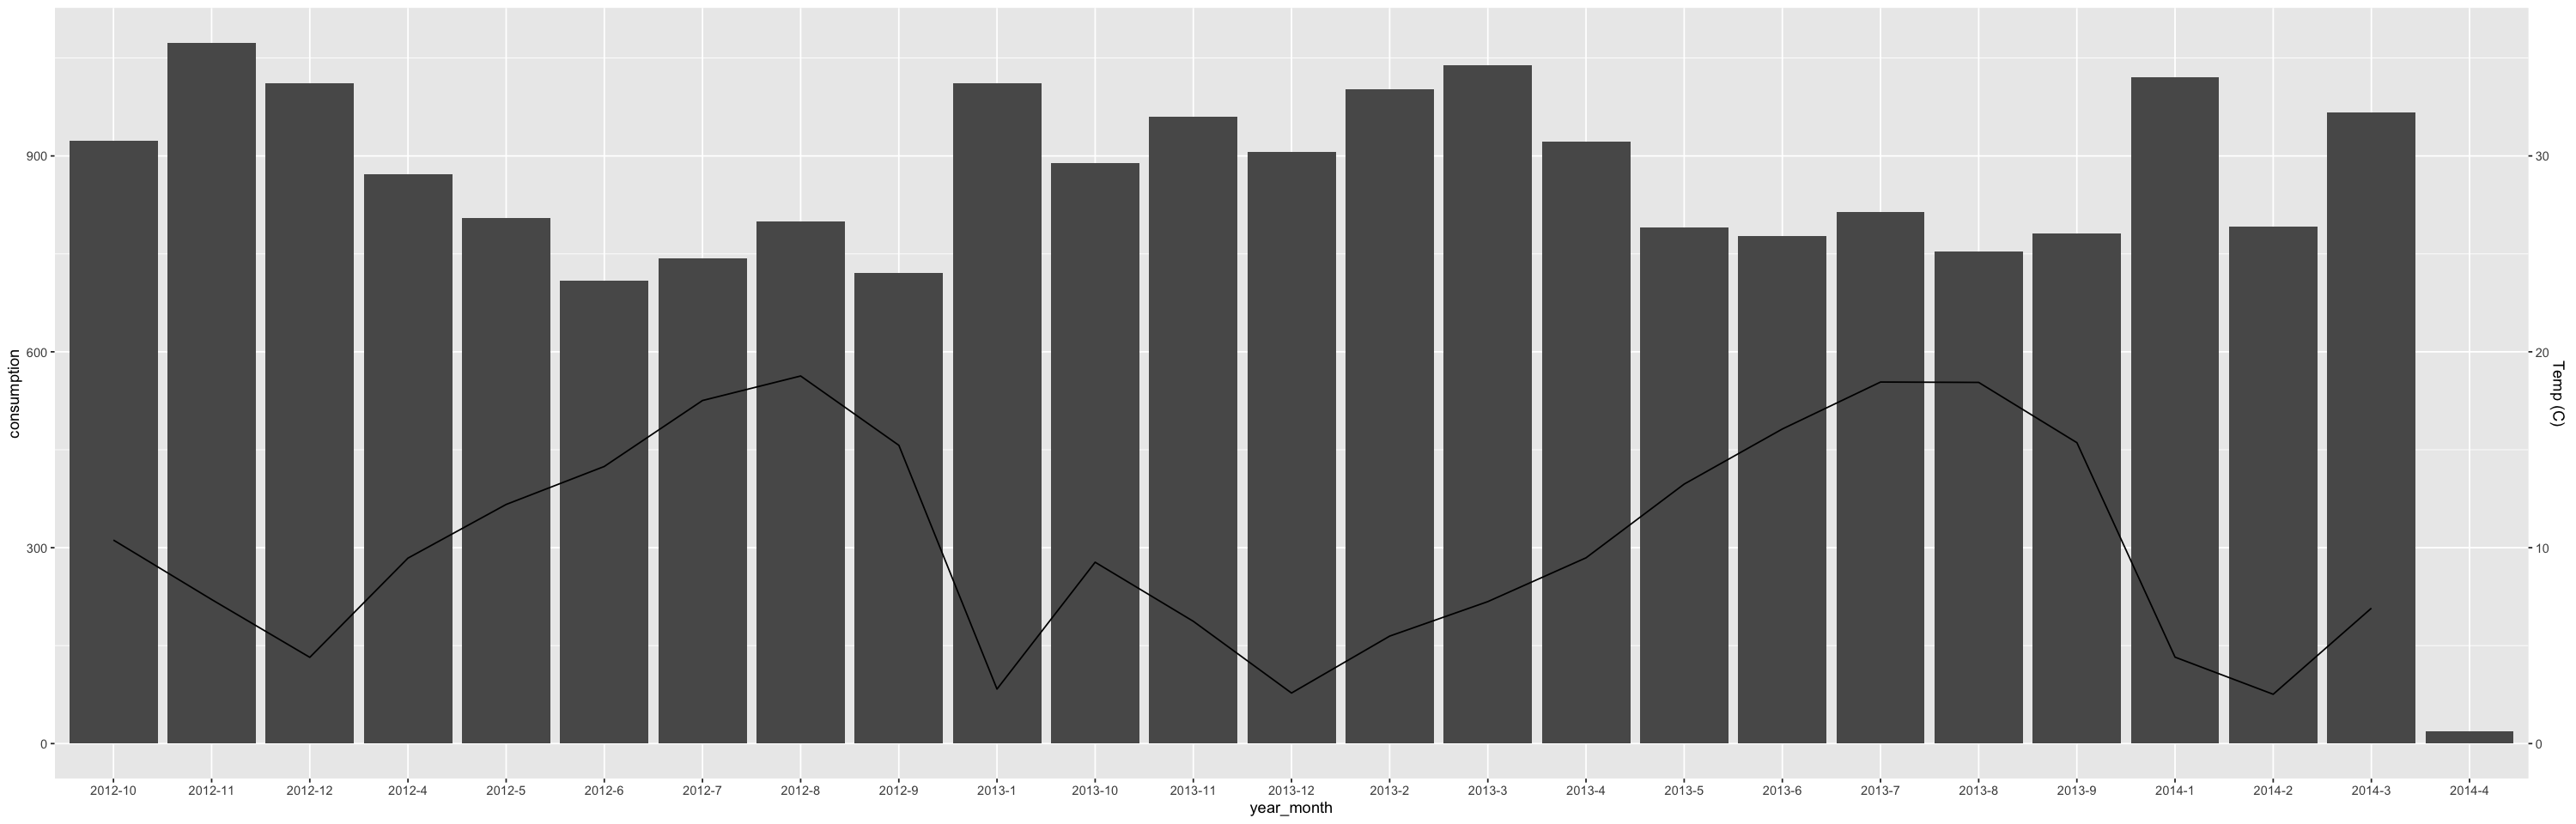

In [50]:
options(repr.plot.width = 25, repr.plot.height = 8)
ggplot(elecDF, aes(x = year_month, y = consumption)) +
    geom_col() + 
    geom_line(data = weatherDF, aes(x = year_month, y = avg_temp * 30, group = 1)) +
    scale_y_continuous(sec.axis=sec_axis( ~ . / 30 , name="Temp (C)"))

In [66]:
lmodel_avg_temp             <- lm(consumption ~ avg_temp, data)
lmodel_avg_dewpt_temp       <- lm(consumption ~ avg_dewpt_temp, data)
lmodel_avg_temp_dewpt_temp  <- lm(consumption ~ avg_temp * avg_dewpt_temp, data)

In [62]:
summary(lmodel_avg_temp)$r.squared

[1] 0.5603246

In [63]:
summary(lmodel_avg_dewpt_temp)$r.squared

[1] 0.4208973

In [67]:
summary(lmodel_avg_temp_dewpt_temp)$r.squared

[1] 0.6650462